# Label Propagation

In all of the previous notebooks, the data has been defined in terms of feature vectors. However, there are a lot of data sets that would be better described by a relational structure, such as a graph. A graph $G = (V,E)$ is a tuple of sets, $V$ and $E$, where $V$ is the set of vertices and $E$ is the set of edges relating pairs of vertices. Social networks are a prime example of datasets that would be better represented with a graph, and community detection is a common algorithm to run on them. Label Propagation is a community detection algorithm for undirected graphs that follows the following steps:

1.  Initialize: assigning each node $v \in V$ a unique label $L(v) = v$
2.  Iterate: at each iteration, every node $v \in V$ updates its label with the formula below and ties are broken randomly

$L(v) = $ argmax| ${u \in N(v) : L(u) = l}$ | 

3.  Repeat 1. and 2. until convergence or the maximum iterations is reached

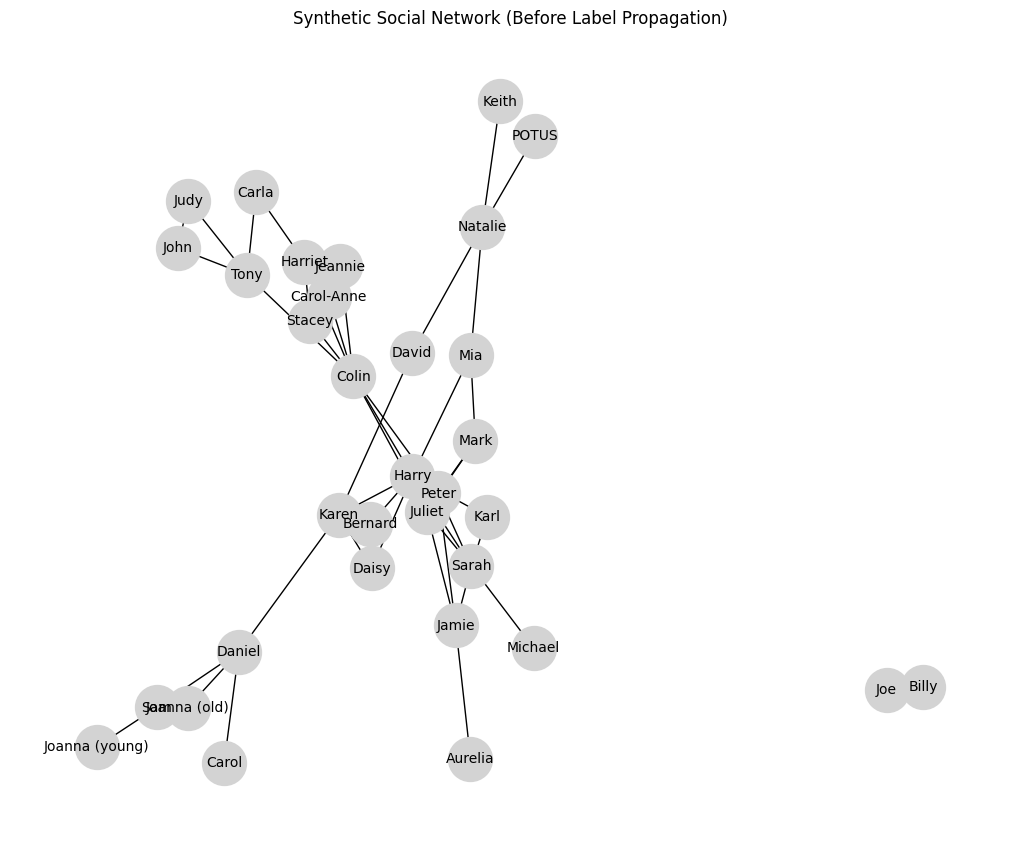

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from collections import Counter

# Initialize graph
G = nx.Graph()

# Adding clusters clearly
characters = ["Mark", "Peter", "Juliet", "Carol-Anne", "Jeannie", "Stacey", "Harriet", "Carla", "Jamie", "Sarah", "Colin", "Tony", "Karl", "Aurelia", "Michael", "Judy", "John",
            "Mia", "Harry", "Bernard", "Keith", "David", "Karen", "Daisy", "Joe", "Billy", "Natalie", "Joanna (young)", "Sam", "Daniel", "Carol", "Joanna (old)", "POTUS"]

edges = [("Mark", "Peter"), ("Mark", "Juliet"), ("Mark", "Mia"), ("Peter", "Juliet"), ("Peter", "Jamie"), ("Peter", "Sarah"), ("Peter", "Colin"), ("Juliet", "Jamie"),
        ("Juliet", "Sarah"), ("Juliet", "Colin"), ("Carol-Anne", "Jeannie"), ("Carol-Anne", "Stacey"), ("Carol-Anne", "Harriet"), ("Carol-Anne", "Colin"), ("Jeannie", "Stacey"), 
        ("Jeannie", "Harriet"), ("Jeannie", "Colin"), ("Stacey", "Harriet"), ("Stacey", "Colin"), ("Harriet", "Colin"), ("Harriet", "Carla"), ("Carla", "Tony"), 
        ("Jamie", "Sarah"), ("Jamie", "Aurelia"), ("Sarah", "Michael"), ("Sarah", "Karl"), ("Sarah", "Harry"), ("Colin", "Tony"), ("Colin", "Harry"), ("Tony", "Judy"), 
        ("Tony", "John"), ("Karl", "Harry"), ("Judy", "John"), ("Mia", "Harry"), ("Mia", "Natalie"), ("Harry", "Karen"), ("Harry", "Bernard"), ("Harry", "Daisy"), 
        ("Bernard", "Karen"), ("Bernard", "Daisy"), ("Keith", "Natalie"), ("David", "Natalie"), ("David", "Karen"), ("Karen", "Daisy"), ("Karen", "Daniel"), ("Joe", "Billy"), 
        ("Natalie", "POTUS"), ("Joanna (young)", "Sam"), ("Sam", "Joanna (old)"), ("Sam", "Daniel"), ("Daniel", "Joanna (old)"), ("Daniel", "Carol")]

G.add_nodes_from(characters)

G.add_edges_from(edges)

# Visualize clearly defined clusters
pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(10,8))
nx.draw(G, pos, with_labels=True, node_color='lightgray', node_size=1000, font_size=10)
plt.title("Synthetic Social Network (Before Label Propagation)")
plt.show()

In [2]:
def label_propagation(G, max_iter=100):
    """
    Performs community detection using the Label Propagation Algorithm (LPA) on a graph.

    Each node in the graph is initially assigned a unique label. During each iteration, 
    a node adopts the most frequent label among its neighbors. This process continues 
    until labels stabilize (convergence) or the maximum number of iterations is reached.

    Parameters:
        G (networkx.Graph): An undirected graph where each node will be assigned a community label.
        max_iter (int, optional): The maximum number of iterations to run the algorithm (default is 100).

    Returns:
        dict: A dictionary mapping each node to its final label (i.e., community assignment).
    """
    # Initialize labels
    labels = {node: node for node in G.nodes()}

    for iteration in range(max_iter):
        changed = False
        nodes = list(G.nodes())
        random.shuffle(nodes)  # Random order for fairness

        for node in nodes:
            # Count neighbors' labels
            neighbor_labels = [labels[neighbor] for neighbor in G.neighbors(node)]
            if neighbor_labels:
                # Most common label among neighbors
                most_common_label, _ = Counter(neighbor_labels).most_common(1)[0]
                if labels[node] != most_common_label:
                    labels[node] = most_common_label
                    changed = True

        if not changed:
            print(f"Converged after {iteration+1} iterations.")
            break

    return labels

# Run algorithm
final_labels = label_propagation(G)

Converged after 4 iterations.


In [3]:
from collections import defaultdict

# Group nodes by labels
communities = defaultdict(list)
for node, label in final_labels.items():
    communities[label].append(node)

print("Detected Communities:")
for idx, community in enumerate(communities.values(), 1):
    print(f"Community {idx}: {community}")

Detected Communities:
Community 1: ['Mark', 'Peter', 'Juliet', 'Jamie', 'Sarah', 'Karl', 'Aurelia', 'Michael', 'Mia', 'Harry']
Community 2: ['Carol-Anne', 'Jeannie', 'Stacey', 'Harriet', 'Carla', 'Colin', 'Tony', 'Judy', 'John']
Community 3: ['Bernard', 'Karen', 'Daisy', 'Daniel', 'Carol']
Community 4: ['Keith', 'David', 'Natalie', 'POTUS']
Community 5: ['Joe', 'Billy']
Community 6: ['Joanna (young)', 'Sam', 'Joanna (old)']


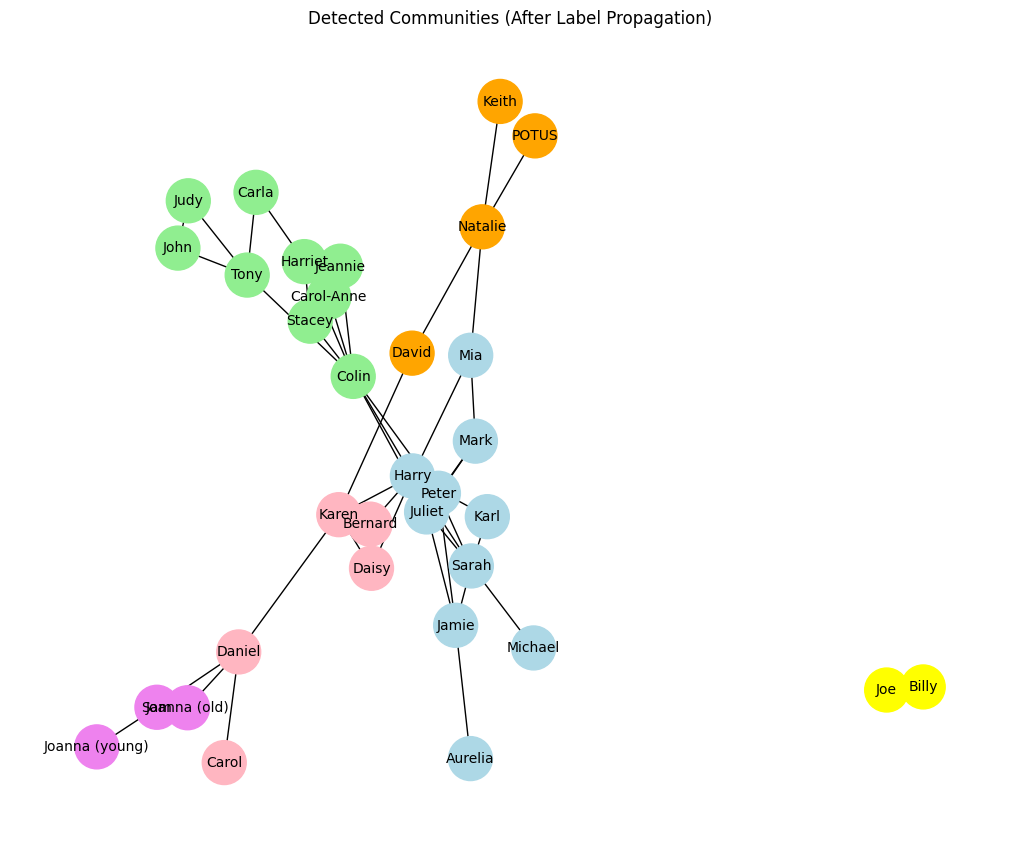

In [4]:
color_map = ['lightblue', 'lightgreen', 'lightpink', 'orange', 'yellow', 'violet', 'cyan']
node_colors = {}
for idx, community in enumerate(communities.values()):
        for node in community:
                node_colors[node] = color_map[idx % len(color_map)]

# Plot clearly labeled communities
plt.figure(figsize=(10,8))
nx.draw(G, pos, with_labels=True, node_color=[node_colors[node] for node in G.nodes()], node_size=1000, font_size=10)
plt.title("Detected Communities (After Label Propagation)")
plt.show()